In [267]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/titanic.csv
/kaggle/input/titanic/titanic.txt
/kaggle/input/ultima-all-clean/ultima_all_clean.csv


# **Ex. 1 Perform preprocessing as follows :**
1. Set index of data to hn numbers
2. Remove missing values
3. Remove these unnecessary columns hiv, size, utmet, vgmet, surgery, pchemo
4. Change age into 2 values 'Young' (age <= 20) and 'Old' (age > 20)
5. Separate data into groups based on pmmet values
6. for each group, randomly choose 10 data**

In [268]:
df = pd.read_csv('../input/ultima-all-clean/ultima_all_clean.csv', sep=',', header = 0)
df

,hn,age,parity,hiv,menopaus,disease,surgery,conization,OPDsize,appearance,...,nodeyiel,RHlvsi,depth,size,utmet,vgmargin,vgmet,pelvicme,pmmet,adnmet
0,2631840,52,3,0.0,0.0,1,1,0.0,5.0,4.0,...,21.0,0.0,3.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2633481,32,2,0.0,0.0,0,1,0.0,5.0,1.0,...,11.0,0.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,2.0
2,2634477,52,2,0.0,0.0,0,0,0.0,5.0,NaN,...,35.0,6.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2633633,38,2,0.0,0.0,0,0,0.0,2.0,1.0,...,20.0,16.0,3.0,3.8,0.0,0.0,0.0,0.0,0.0,2.0
4,2630496,55,3,0.0,1.0,0,0,1.0,0.0,5.0,...,17.0,9.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1718,3169688,47,2,0.0,0.0,0,0,1.0,0.0,5.0,...,42.0,5.0,2.0,1.1,0.0,0.0,0.0,0.0,0.0,2.0
1719,3167041,39,1,0.0,0.0,0,0,1.0,0.0,5.0,...,20.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,2.0
1720,2623351,46,2,0.0,0.0,0,0,1.0,0.0,5.0,...,13.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1721,3302539,44,3,0.0,0.0,0,1,1.0,0.0,5.0,...,15.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [269]:
df_c = df
df_c.isnull().any()

hn            False
age           False
parity        False
hiv            True
menopaus       True
disease       False
surgery       False
conization     True
OPDsize        True
appearance     True
stage          True
pchemo         True
Wardsize       True
finalhisto     True
nodeyiel       True
RHlvsi         True
depth          True
size           True
utmet          True
vgmargin       True
vgmet          True
pelvicme       True
pmmet          True
adnmet         True
dtype: bool

In [270]:
df_c = df_c.dropna(0,'any')
df_c.isnull().any()

hn            False
age           False
parity        False
hiv           False
menopaus      False
disease       False
surgery       False
conization    False
OPDsize       False
appearance    False
stage         False
pchemo        False
Wardsize      False
finalhisto    False
nodeyiel      False
RHlvsi        False
depth         False
size          False
utmet         False
vgmargin      False
vgmet         False
pelvicme      False
pmmet         False
adnmet        False
dtype: bool

In [271]:
df_c = df_c.drop('hiv',1)
df_c = df_c.drop('size',1)
df_c = df_c.drop('utmet',1)
df_c = df_c.drop('vgmet',1)
df_c = df_c.drop('surgery',1)
df_c = df_c.drop('pchemo',1)
df_c

,hn,age,parity,menopaus,disease,conization,OPDsize,appearance,stage,Wardsize,finalhisto,nodeyiel,RHlvsi,depth,vgmargin,pelvicme,pmmet,adnmet
0,2631840,52,3,0.0,1,0.0,5.0,4.0,5.0,5.0,3.0,21.0,0.0,3.0,0.0,0.0,0.0,0.0
1,2633481,32,2,0.0,0,0.0,5.0,1.0,5.0,5.0,1.0,11.0,0.0,3.0,0.0,1.0,0.0,2.0
3,2633633,38,2,0.0,0,0.0,2.0,1.0,4.0,3.0,3.0,20.0,16.0,3.0,0.0,0.0,0.0,2.0
4,2630496,55,3,1.0,0,1.0,0.0,5.0,4.0,0.0,1.0,17.0,9.0,3.0,0.0,1.0,0.0,0.0
5,2450167,67,5,1.0,1,0.0,3.0,2.0,4.0,3.0,1.0,34.0,38.0,3.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1693,3812011,57,2,1.0,1,1.0,0.0,5.0,4.0,1.0,1.0,18.0,0.0,3.0,2.0,0.0,0.0,0.0
1694,3813471,42,2,0.0,1,0.0,3.0,2.0,4.0,3.0,1.0,33.0,999.0,3.0,2.0,1.0,1.0,0.0
1695,3812935,53,1,1.0,1,1.0,0.0,5.0,4.0,0.0,1.0,17.0,0.0,3.0,0.0,0.0,1.0,0.0
1718,3169688,47,2,0.0,0,1.0,0.0,5.0,4.0,0.0,1.0,42.0,5.0,2.0,0.0,0.0,0.0,2.0


In [272]:
df_c = df_c.set_index('hn')
df_c

,age,parity,menopaus,disease,conization,OPDsize,appearance,stage,Wardsize,finalhisto,nodeyiel,RHlvsi,depth,vgmargin,pelvicme,pmmet,adnmet
hn,,,,,,,,,,,,,,,,,
2631840,52,3,0.0,1,0.0,5.0,4.0,5.0,5.0,3.0,21.0,0.0,3.0,0.0,0.0,0.0,0.0
2633481,32,2,0.0,0,0.0,5.0,1.0,5.0,5.0,1.0,11.0,0.0,3.0,0.0,1.0,0.0,2.0
2633633,38,2,0.0,0,0.0,2.0,1.0,4.0,3.0,3.0,20.0,16.0,3.0,0.0,0.0,0.0,2.0
2630496,55,3,1.0,0,1.0,0.0,5.0,4.0,0.0,1.0,17.0,9.0,3.0,0.0,1.0,0.0,0.0
2450167,67,5,1.0,1,0.0,3.0,2.0,4.0,3.0,1.0,34.0,38.0,3.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3812011,57,2,1.0,1,1.0,0.0,5.0,4.0,1.0,1.0,18.0,0.0,3.0,2.0,0.0,0.0,0.0
3813471,42,2,0.0,1,0.0,3.0,2.0,4.0,3.0,1.0,33.0,999.0,3.0,2.0,1.0,1.0,0.0
3812935,53,1,1.0,1,1.0,0.0,5.0,4.0,0.0,1.0,17.0,0.0,3.0,0.0,0.0,1.0,0.0


In [273]:
df_c.loc[: , ('age')] = df_c.loc[: , ('age')]<=20
df_c.loc[: , ('age')] = df_c.loc[: , ('age')].replace(True,'Young').replace(False, 'Old')
df_c

,age,parity,menopaus,disease,conization,OPDsize,appearance,stage,Wardsize,finalhisto,nodeyiel,RHlvsi,depth,vgmargin,pelvicme,pmmet,adnmet
hn,,,,,,,,,,,,,,,,,
2631840,Old,3,0.0,1,0.0,5.0,4.0,5.0,5.0,3.0,21.0,0.0,3.0,0.0,0.0,0.0,0.0
2633481,Old,2,0.0,0,0.0,5.0,1.0,5.0,5.0,1.0,11.0,0.0,3.0,0.0,1.0,0.0,2.0
2633633,Old,2,0.0,0,0.0,2.0,1.0,4.0,3.0,3.0,20.0,16.0,3.0,0.0,0.0,0.0,2.0
2630496,Old,3,1.0,0,1.0,0.0,5.0,4.0,0.0,1.0,17.0,9.0,3.0,0.0,1.0,0.0,0.0
2450167,Old,5,1.0,1,0.0,3.0,2.0,4.0,3.0,1.0,34.0,38.0,3.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3812011,Old,2,1.0,1,1.0,0.0,5.0,4.0,1.0,1.0,18.0,0.0,3.0,2.0,0.0,0.0,0.0
3813471,Old,2,0.0,1,0.0,3.0,2.0,4.0,3.0,1.0,33.0,999.0,3.0,2.0,1.0,1.0,0.0
3812935,Old,1,1.0,1,1.0,0.0,5.0,4.0,0.0,1.0,17.0,0.0,3.0,0.0,0.0,1.0,0.0


In [274]:
df_pm = df_c.groupby('pmmet').sample(n = 10)
df_pm

,age,parity,menopaus,disease,conization,OPDsize,appearance,stage,Wardsize,finalhisto,nodeyiel,RHlvsi,depth,vgmargin,pelvicme,pmmet,adnmet
hn,,,,,,,,,,,,,,,,,
2955740,Old,2,0.0,0,1.0,0.0,5.0,4.0,1.5,2.0,17.0,0.0,2.0,0.0,0.0,0.0,0.0
3040072,Old,1,0.0,0,0.0,3.0,1.0,6.0,3.0,1.0,49.0,0.0,1.0,1.0,0.0,0.0,0.0
2816659,Old,1,0.0,1,0.0,2.0,2.0,4.0,2.0,1.0,24.0,11.0,3.0,0.0,0.0,0.0,2.0
2896098,Old,3,0.0,1,0.0,3.0,1.0,4.0,3.0,3.0,23.0,0.0,2.0,0.0,0.0,0.0,0.0
3081085,Old,2,0.0,0,0.0,8.0,1.0,5.0,4.0,2.0,26.0,7.0,3.0,0.0,1.0,0.0,0.0
2721375,Old,5,0.0,0,0.0,5.0,1.0,5.0,5.0,1.0,26.0,999.0,3.0,0.0,0.0,0.0,0.0
3089592,Old,2,0.0,0,0.0,3.0,1.0,4.0,3.5,1.0,16.0,40.0,3.0,0.0,0.0,0.0,0.0
3528063,Old,0,0.0,0,0.0,3.0,1.0,4.0,2.5,1.0,25.0,4.0,2.0,0.0,0.0,0.0,2.0
2822471,Old,1,0.0,0,1.0,3.0,2.0,4.0,3.0,1.0,27.0,9.0,3.0,0.0,0.0,0.0,2.0



# **Ex. 2 P Please explore this dataset and report at least 5 facts about this dataset**

<AxesSubplot:xlabel='age'>

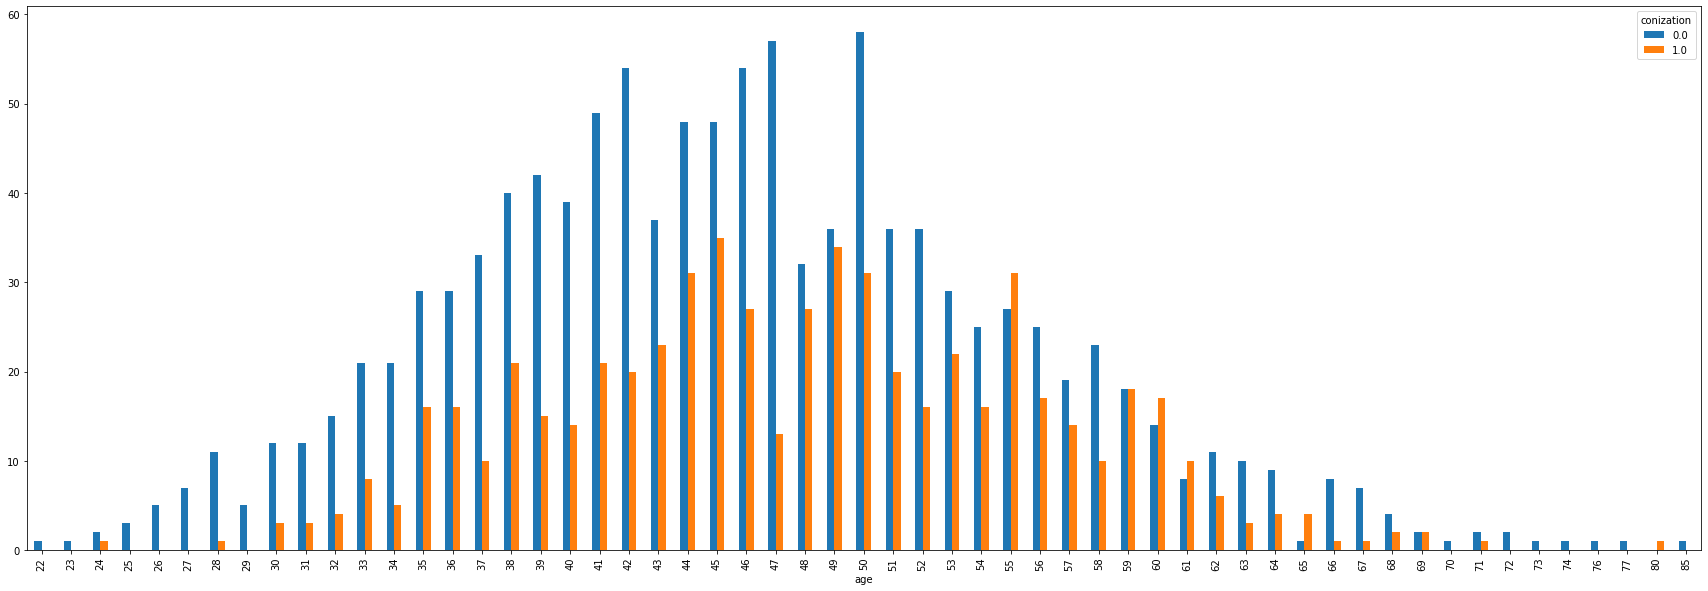

In [275]:
pd.crosstab(df['age'],df['conization']).plot(kind='bar',figsize=(30,10))

<AxesSubplot:xlabel='age'>

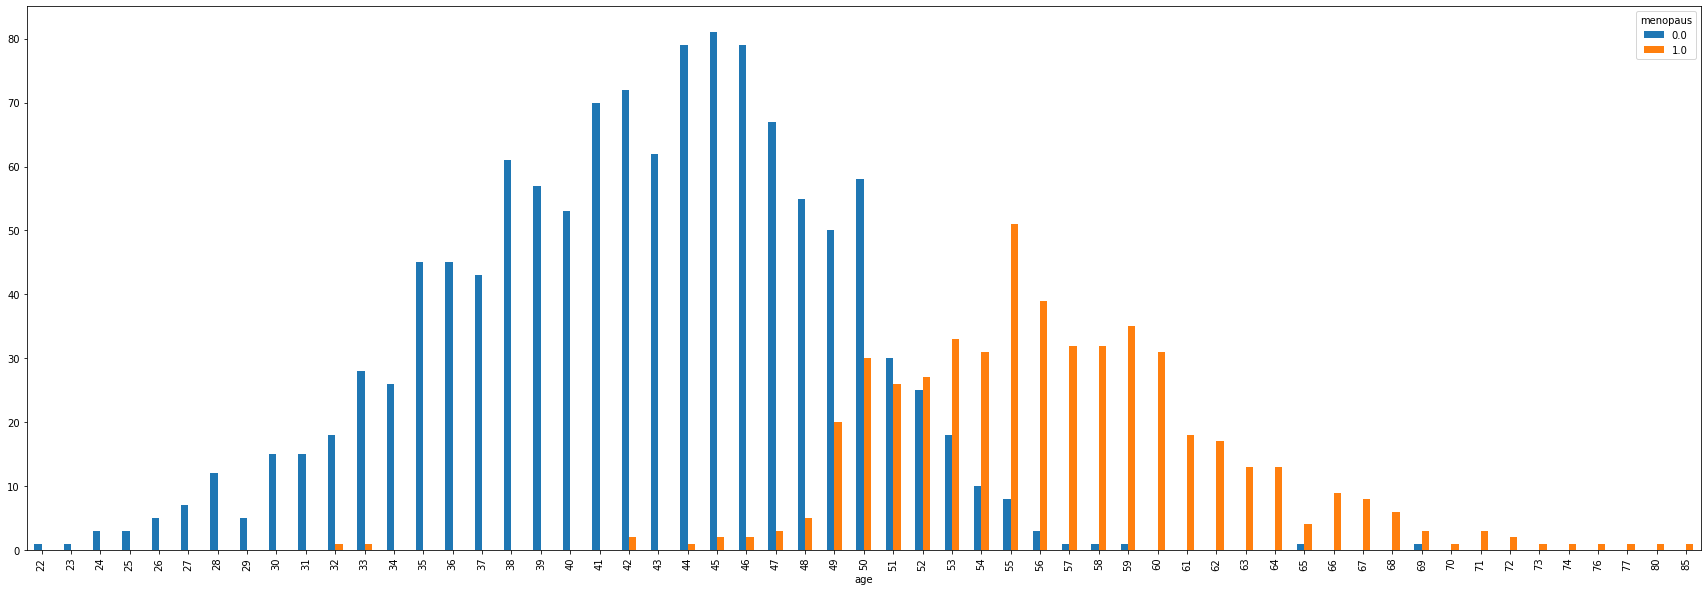

In [276]:
pd.crosstab(df['age'],df['menopaus']).plot(kind='bar',figsize=(30,10))

<AxesSubplot:xlabel='appearance'>

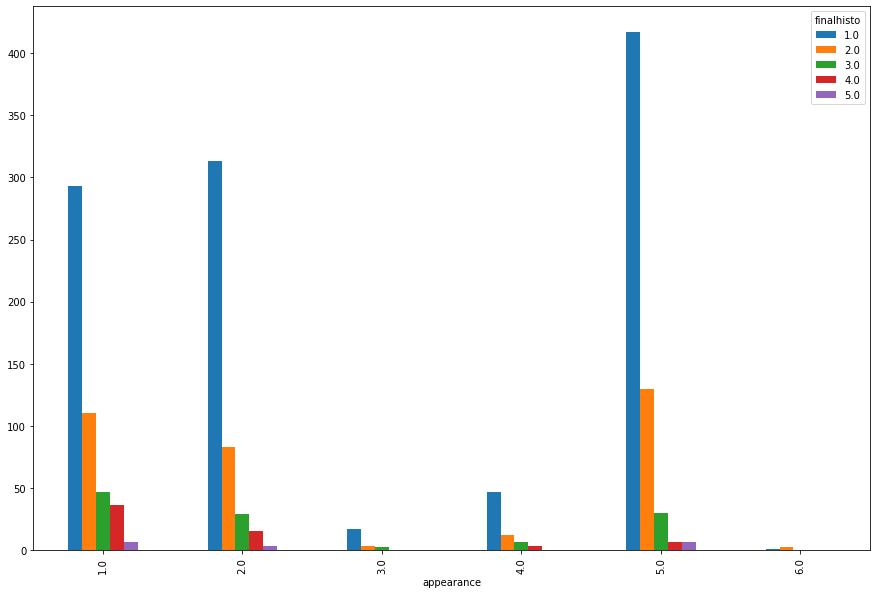

In [277]:
pd.crosstab(df['appearance'],df['finalhisto']).plot(kind='bar',figsize=(15,10))

<AxesSubplot:xlabel='pmmet'>

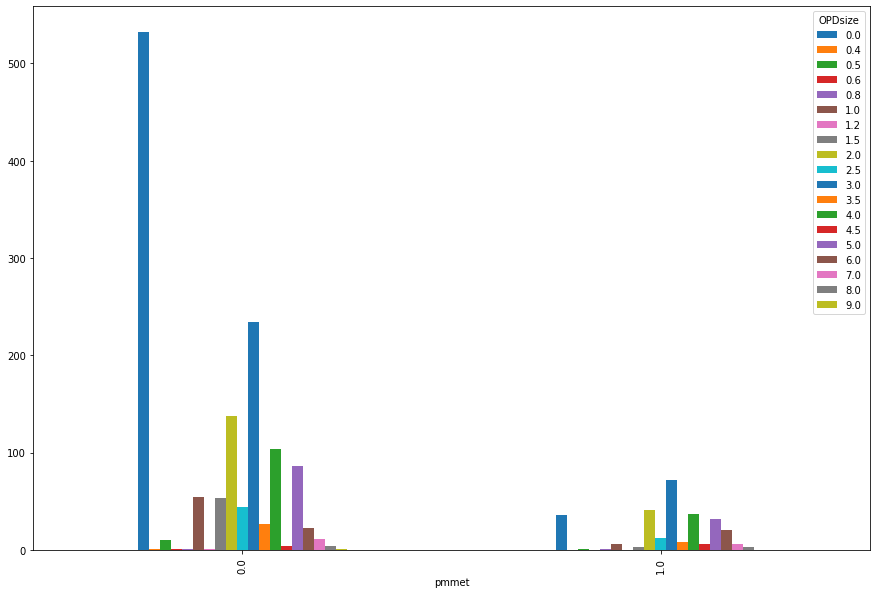

In [278]:
pd.crosstab(df['pmmet'],df['OPDsize']).plot(kind='bar',figsize=(15,10))

<AxesSubplot:xlabel='depth'>

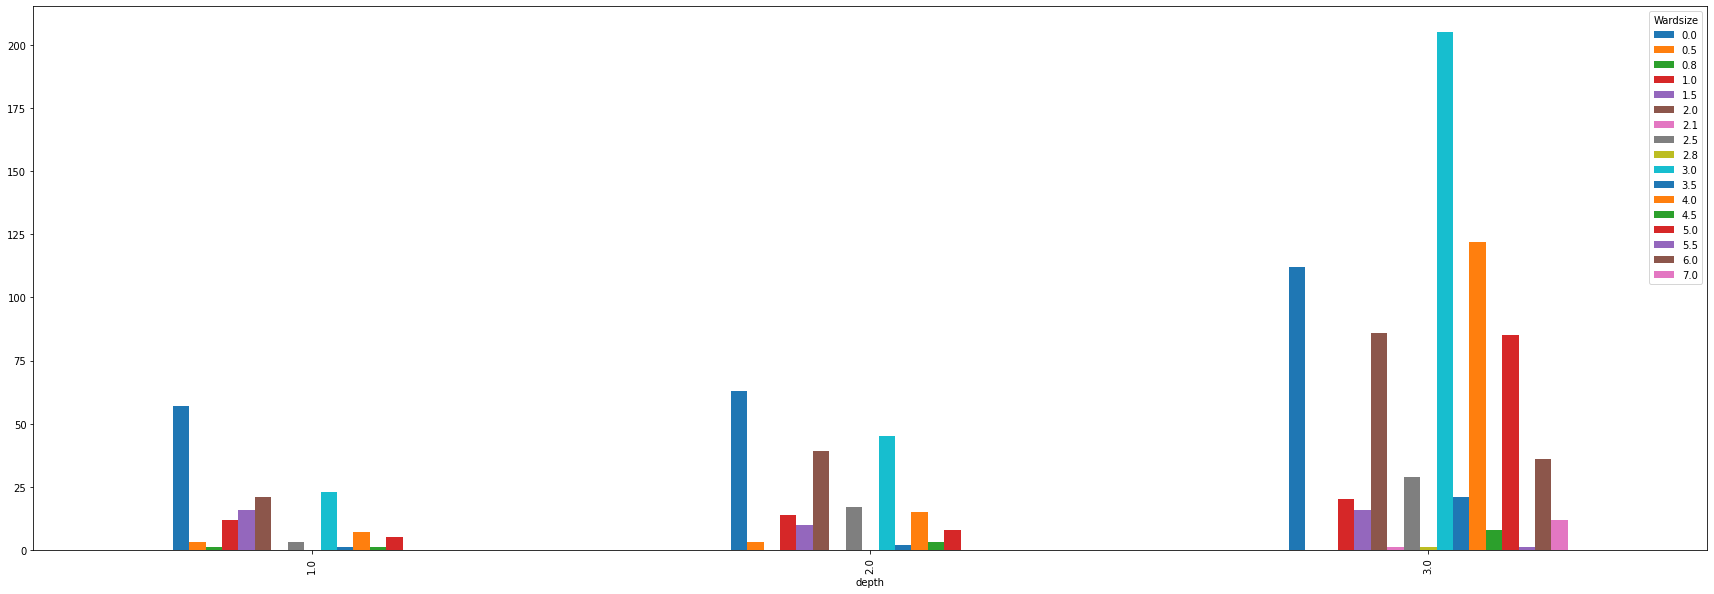

In [279]:
pd.crosstab(df['depth'],df['Wardsize']).plot(kind='bar',figsize=(30,10))

# **EX 3**

In [329]:
covidmap = folium.Map(location = [18.7886874971952, 98.98527525203751], zoom_start =13)
folium.CircleMarker(
  location = [18.80717192548617, 98.98959379899621],
  radius = 50,
  color = '#FF0000',
  fill = True,
  fill_color = '#FF0000'
).add_to(covidmap)

folium.CircleMarker(
  location = [18.775542432258217, 99.03275815866579],
  radius = 25,
  color = '#FF0000',
  fill = True,
  fill_color = '#FF0000'
).add_to(covidmap)

folium.CircleMarker(
  location = [18.73702819644548, 98.95356336316607],
  radius = 20,
  color = '#FF0000',
  fill = True,
  fill_color = '#FF0000'
).add_to(covidmap)

folium.CircleMarker(
  location = [18.77266522653052, 98.99036437788851],
  radius = 20,
  color = '#FF0000',
  fill = True,
  fill_color = '#FF0000'
).add_to(covidmap)

folium.CircleMarker(
  location = [18.834828881383956, 99.0259018239929],
  radius = 36,
  color = '#FF0000',
  fill = True,
  fill_color = '#FF0000'
).add_to(covidmap)

covidmap

loc = geocoder.osm('โควิดเชียงใหม่')
folium.CircleMarker(
  location = [18.774930276389213, 99.05431550860783],
  radius = 20,
  color = '#FF0000',
  fill = True,
  fill_color = '#FF0000'
).add_to(covidmap)
cmu_map

In [281]:
!pip install numpy

In [282]:
import numpy as np

In [283]:
a = 'Male'
b ='Yes'
if a == 'Male' and b == 'Yes':
    print("Good")
else:
    print('Bad')

Good


In [284]:
a = np.array([1,0,0])
b = np.array([1,0,1])
if np.where(a == 1) and np.where(b == 0):
    print("Good")
else:
    print("Bad")

Good


In [285]:
a = np.hstack( (np.array(['M','M','F']).reshape(3,1) , np.array(['Y','Y','N']).reshape(3,1)) )
a

array([['M', 'Y'],
       ['M', 'Y'],
       ['F', 'N']], dtype='<U1')

In [286]:
a[:,0] == 'M'

array([ True,  True, False])

In [287]:
a[:,1] == 'Y'

array([ True,  True, False])

In [288]:
a[ (a[:,0] == 'M') & (a[:,1] == 'Y')]

array([['M', 'Y'],
       ['M', 'Y']], dtype='<U1')

In [289]:
import numpy as np
titanics = np.genfromtxt('../input/titanic/titanic.txt',delimiter='\t',missing_values = None,dtype=str)

In [290]:
titanics[0,:]

array(['Passenger Class', 'Name', 'Sex', 'Age',
       'No of Siblings or Spouses on Board',
       'No of Parents or Children on Board', 'Ticket Number',
       'Passenger Fare', 'Cabin', 'Port of Embarkation', 'Life Boat',
       'Survived'], dtype='<U84')

In [291]:
import matplotlib.pyplot as plt

(array([891., 319.,   0.,  42.,   0.,  20.,  22.,   0.,   6.,   9.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

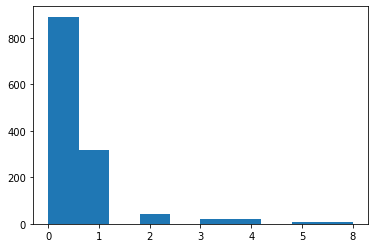

In [292]:
plt.hist(titanics[1:,4])

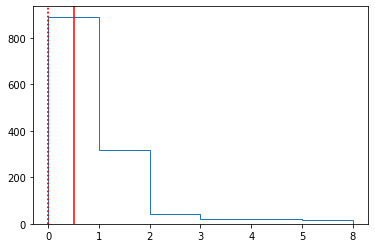

In [293]:
plt.hist(titanics[1:,4], bins=np.unique(titanics[1:,4]),  histtype='step')
plt.axvline(np.array([float(item) for item in titanics[1:,4]]).mean(), c='Red')
plt.axvline(np.percentile(np.array([float(item) for item in titanics[1:,4]]),0.75), c='Red',linestyle=':')
plt.axvline(np.percentile(np.array([float(item) for item in titanics[1:,4]]),0.25), c='Red',linestyle=':')

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc08a724d50>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc08a72a610>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc08a7249d0>,
 'medians': [<matplotlib.lines.Line2D at 0x7fc08a72aed0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fc08a733350>,
 'means': []}

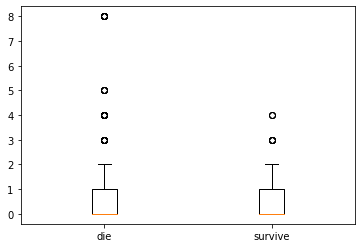

In [294]:
relative = np.array([float(item) for item in titanics[1:,4]])
survive = titanics[1:,-1]
plt.boxplot([relative[survive=='No'], relative[survive=='Yes'] ], labels = ['die','survive'])

Text(0, 0.5, 'children')

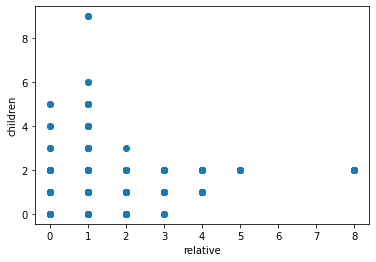

In [295]:
import seaborn as sns
relative = np.array([float(item) for item in titanics[1:,4]])
children = np.array([float(item) for item in titanics[1:,5]])
plt.scatter(relative,children)
plt.xlabel("relative")
plt.ylabel("children")

In [296]:
import folium
world_map = folium.Map()
world_map

In [297]:
cmu_map = folium.Map(location = [18.7971238,98.9537993], zoom_start =15)
cmu_map

In [298]:

cmu_map = folium.Map(location = [18.7971238,98.9537993], zoom_start =15, tiles='Stamen Terrain')
cmu_map

In [299]:

folium.TileLayer('Stamen Watercolor').add_to(cmu_map)
cmu_map

In [300]:
!pip install geocoder
import geocoder

In [301]:
location = 'น้ำตกแม่สา'
loc = geocoder.osm(location)
loc.json

{'accuracy': 0.75,
 'address': 'น้ำตกแม่สา, แม่แรม, จังหวัดเชียงใหม่, 50180, ประเทศไทย',
 'bbox': {'northeast': [18.9066127, 98.8967386],
  'southwest': [18.9065127, 98.8966386]},
 'confidence': 10,
 'country': 'ประเทศไทย',
 'country_code': 'th',
 'importance': 0.75,
 'lat': 18.9065627,
 'lng': 98.8966886,
 'ok': True,
 'osm_id': 1638690882,
 'osm_type': 'node',
 'place_id': 16442596,
 'place_rank': 20,
 'postal': '50180',
 'quality': 'waterfall',
 'raw': {'place_id': 16442596,
  'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright',
  'osm_type': 'node',
  'osm_id': 1638690882,
  'boundingbox': ['18.9065127', '18.9066127', '98.8966386', '98.8967386'],
  'lat': '18.9065627',
  'lon': '98.8966886',
  'display_name': 'น้ำตกแม่สา, แม่แรม, จังหวัดเชียงใหม่, 50180, ประเทศไทย',
  'place_rank': 20,
  'category': 'waterway',
  'type': 'waterfall',
  'importance': 0.75,
  'address': {'waterway': 'น้ำตกแม่สา',
   'town': 'แม่แรม',
   'state': 'จังหวัดเชียงใหม่',
   

In [302]:
from folium import Map, Marker, GeoJson, LayerControl
latlng = [loc.lat, loc.lng]
maesa_map = Map(location=latlng, zoom_start=15)
maesa_map

In [303]:
from folium import Map, Marker, GeoJson, LayerControl
latlng = [loc.lat, loc.lng]
maesa_map = Map(location=latlng, zoom_start=15)
maesa_map

In [304]:
from folium import Map, Marker, GeoJson, LayerControl
latlng = [loc.lat, loc.lng]
maesa_map = Map(location=latlng, zoom_start=15)
maesa_map

In [305]:
from folium import Map, Marker, GeoJson, LayerControl
latlng = [loc.lat, loc.lng]
maesa_map = Map(location=latlng, zoom_start=15)
maesa_map

In [306]:
import pandas as pd

In [307]:
df = pd.read_csv('/kaggle/input/titanic/titanic.txt', sep='\t', header = 0)
df

,Passenger Class,Name,Sex,Age,No of Siblings or Spouses on Board,No of Parents or Children on Board,Ticket Number,Passenger Fare,Cabin,Port of Embarkation,Life Boat,Survived
0,First,"Allen, Miss. Elisabeth Walton",Female,29.0000,0,0,24160,211.3375,B5,Southampton,2,Yes
1,First,"Allison, Master. Hudson Trevor",Male,0.9167,1,2,113781,151.5500,C22 C26,Southampton,11,Yes
2,First,"Allison, Miss. Helen Loraine",Female,2.0000,1,2,113781,151.5500,C22 C26,Southampton,NaN,No
3,First,"Allison, Mr. Hudson Joshua Creighton",Male,30.0000,1,2,113781,151.5500,C22 C26,Southampton,NaN,No
4,First,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",Female,25.0000,1,2,113781,151.5500,C22 C26,Southampton,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,Third,"Zabour, Miss. Hileni",Female,14.5000,1,0,2665,14.4542,NaN,Cherbourg,NaN,No
1305,Third,"Zabour, Miss. Thamine",Female,NaN,1,0,2665,14.4542,NaN,Cherbourg,NaN,No
1306,Third,"Zakarian, Mr. Mapriededer",Male,26.5000,0,0,2656,7.2250,NaN,Cherbourg,NaN,No
1307,Third,"Zakarian, Mr. Ortin",Male,27.0000,0,0,2670,7.2250,NaN,Cherbourg,NaN,No


In [308]:
df.columns

Index(['Passenger Class', 'Name', 'Sex', 'Age',
       'No of Siblings or Spouses on Board',
       'No of Parents or Children on Board', 'Ticket Number', 'Passenger Fare',
       'Cabin', 'Port of Embarkation', 'Life Boat', 'Survived'],
      dtype='object')

In [309]:
df.values

array([['First', 'Allen, Miss. Elisabeth Walton', 'Female', ...,
        'Southampton', '2', 'Yes'],
       ['First', 'Allison, Master. Hudson Trevor', 'Male', ...,
        'Southampton', '11', 'Yes'],
       ['First', 'Allison, Miss. Helen Loraine', 'Female', ...,
        'Southampton', nan, 'No'],
       ...,
       ['Third', 'Zakarian, Mr. Mapriededer', 'Male', ..., 'Cherbourg',
        nan, 'No'],
       ['Third', 'Zakarian, Mr. Ortin', 'Male', ..., 'Cherbourg', nan,
        'No'],
       ['Third', 'Zimmerman, Mr. Leo', 'Male', ..., 'Southampton', nan,
        'No']], dtype=object)

In [310]:
df['Name']

0                         Allen, Miss. Elisabeth Walton
1                        Allison, Master. Hudson Trevor
2                          Allison, Miss. Helen Loraine
3                  Allison, Mr. Hudson Joshua Creighton
4       Allison, Mrs. Hudson J C (Bessie Waldo Daniels)
                             ...                       
1304                               Zabour, Miss. Hileni
1305                              Zabour, Miss. Thamine
1306                          Zakarian, Mr. Mapriededer
1307                                Zakarian, Mr. Ortin
1308                                 Zimmerman, Mr. Leo
Name: Name, Length: 1309, dtype: object

In [311]:
df.iloc[2,0:5]

Passenger Class                                              First
Name                                  Allison, Miss. Helen Loraine
Sex                                                         Female
Age                                                            2.0
No of Siblings or Spouses on Board                               1
Name: 2, dtype: object

In [312]:
df.iloc[:,3]

0       29.0000
1        0.9167
2        2.0000
3       30.0000
4       25.0000
         ...   
1304    14.5000
1305        NaN
1306    26.5000
1307    27.0000
1308    29.0000
Name: Age, Length: 1309, dtype: float64

In [313]:
df.loc[2,'Passenger Class':'Age']

Passenger Class                           First
Name               Allison, Miss. Helen Loraine
Sex                                      Female
Age                                         2.0
Name: 2, dtype: object

In [314]:
df.dtypes

Passenger Class                        object
Name                                   object
Sex                                    object
Age                                   float64
No of Siblings or Spouses on Board      int64
No of Parents or Children on Board      int64
Ticket Number                          object
Passenger Fare                        float64
Cabin                                  object
Port of Embarkation                    object
Life Boat                              object
Survived                               object
dtype: object

In [315]:
df[ df['Age'] == df['Age'].min()]

,Passenger Class,Name,Sex,Age,No of Siblings or Spouses on Board,No of Parents or Children on Board,Ticket Number,Passenger Fare,Cabin,Port of Embarkation,Life Boat,Survived
763,Third,"Dean, Miss. Elizabeth Gladys 'Millvina'",Female,0.1667,1,2,C.A. 2315,20.575,NaN,Southampton,10,Yes


In [316]:
df['Name'][df['Age']==df['Age'].max()]

14    Barkworth, Mr. Algernon Henry Wilson
Name: Name, dtype: object

In [317]:
df.shape

(1309, 12)

**Data type แบบ Series**

In [318]:
df.values

array([['First', 'Allen, Miss. Elisabeth Walton', 'Female', ...,
        'Southampton', '2', 'Yes'],
       ['First', 'Allison, Master. Hudson Trevor', 'Male', ...,
        'Southampton', '11', 'Yes'],
       ['First', 'Allison, Miss. Helen Loraine', 'Female', ...,
        'Southampton', nan, 'No'],
       ...,
       ['Third', 'Zakarian, Mr. Mapriededer', 'Male', ..., 'Cherbourg',
        nan, 'No'],
       ['Third', 'Zakarian, Mr. Ortin', 'Male', ..., 'Cherbourg', nan,
        'No'],
       ['Third', 'Zimmerman, Mr. Leo', 'Male', ..., 'Southampton', nan,
        'No']], dtype=object)

In [319]:
df['Label'] = df['Age'] >= 20
df

,Passenger Class,Name,Sex,Age,No of Siblings or Spouses on Board,No of Parents or Children on Board,Ticket Number,Passenger Fare,Cabin,Port of Embarkation,Life Boat,Survived,Label
0,First,"Allen, Miss. Elisabeth Walton",Female,29.0000,0,0,24160,211.3375,B5,Southampton,2,Yes,True
1,First,"Allison, Master. Hudson Trevor",Male,0.9167,1,2,113781,151.5500,C22 C26,Southampton,11,Yes,False
2,First,"Allison, Miss. Helen Loraine",Female,2.0000,1,2,113781,151.5500,C22 C26,Southampton,NaN,No,False
3,First,"Allison, Mr. Hudson Joshua Creighton",Male,30.0000,1,2,113781,151.5500,C22 C26,Southampton,NaN,No,True
4,First,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",Female,25.0000,1,2,113781,151.5500,C22 C26,Southampton,NaN,No,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,Third,"Zabour, Miss. Hileni",Female,14.5000,1,0,2665,14.4542,NaN,Cherbourg,NaN,No,False
1305,Third,"Zabour, Miss. Thamine",Female,NaN,1,0,2665,14.4542,NaN,Cherbourg,NaN,No,False
1306,Third,"Zakarian, Mr. Mapriededer",Male,26.5000,0,0,2656,7.2250,NaN,Cherbourg,NaN,No,True
1307,Third,"Zakarian, Mr. Ortin",Male,27.0000,0,0,2670,7.2250,NaN,Cherbourg,NaN,No,True


In [320]:
df.isnull()

,Passenger Class,Name,Sex,Age,No of Siblings or Spouses on Board,No of Parents or Children on Board,Ticket Number,Passenger Fare,Cabin,Port of Embarkation,Life Boat,Survived,Label
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,False,False,False,False,False,False,False,False,True,False,True,False,False
1305,False,False,False,True,False,False,False,False,True,False,True,False,False
1306,False,False,False,False,False,False,False,False,True,False,True,False,False
1307,False,False,False,False,False,False,False,False,True,False,True,False,False


In [321]:
df_clean.isnull().any()

NameError: name 'df_clean' is not defined

In [ ]:
df['Age'].isnull().sum()

In [ ]:
df['Passenger Fare'].isnull().sum()

In [ ]:
df['Cabin'].isnull().sum()

In [ ]:
df_clean = df
df_clean = df_clean.drop('Cabin',1)
df_clean = df_clean.drop('Ticket Number',1)
df_clean.columns

In [ ]:
df_clean = df_clean.dropna(1,'any')
df_clean.columns

In [ ]:
df_clean = df_clean.dropna(0,'any')
df_clean

In [ ]:
df_clean['Sex'].unique()

In [ ]:
df_clean['Sex'] = df_clean['Sex'].replace('Female','F')
df_clean['Sex'] = df_clean['Sex'].replace('Male','M')
df_clean

In [ ]:
p_class, levels = pd.factorize(df_clean['Passenger Class'])

In [ ]:
p_class

In [ ]:
levels

In [ ]:
df_clean['Passenger Class'] = p_class + 1
df_clean

In [ ]:
df_clean['Sex'] = pd.factorize(df_clean['Sex'])[0]
df_clean['Survived'] = pd.factorize(df_clean['Survived'])[0]
df_clean.dtypes

In [ ]:
df_clean = df_clean.set_index('Name')
df_clean

In [ ]:
df_clean.loc['Allison, Mr. Hudson Joshua Creighton']['Sex']

In [ ]:
pd.crosstab(df_clean['Passenger Class'],df_clean['Survived']).plot(kind='bar')